In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
#data_path = os.path.join(os.getcwd(), 'scraped_data', 'SHIB-WETH', 'SHIB-WETH_2023-03-24_07-21-05.csv')
data_path = r'd:\Dokumenty\Vejška\Magisterské studium\DIPLOMKA\Code_and_Data\Data_scraping\DEX_data_scraper\scraped_data\HEX-WETH\HEX-WETH_2023-03-31_07-34-14.csv'
df = pd.read_csv(data_path)

In [18]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1500 entries, 2023-03-31 07:11:23 to 2023-03-28 19:22:35
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   buy_order      1500 non-null   bool   
 1   price_USD      1500 non-null   float64
 2   price_native   1500 non-null   float64
 3   amount_token   1500 non-null   float64
 4   total_native   1500 non-null   float64
 5   maker          1500 non-null   object 
 6   etherscan_url  1500 non-null   object 
dtypes: bool(1), float64(4), object(2)
memory usage: 83.5+ KB


,buy_order,price_USD,price_native,amount_token,total_native,maker,etherscan_url
datetime,,,,,,,
2023-03-31 07:11:23,True,0.08995,0.000050,531.299,0.02640,0xa3...aced,https://etherscan.io/tx/0x08db6b606f0bfffdda0c...
2023-03-31 07:11:11,True,0.08993,0.000050,595.726,0.02960,0x42...cf69,https://etherscan.io/tx/0x50e8b16740ddf0a35411...
2023-03-31 07:09:47,False,0.08946,0.000050,1000.000,0.04950,0x45...f755,https://etherscan.io/tx/0x18c0b97a3e6192be5b59...
2023-03-31 07:08:11,True,0.08995,0.000050,397.707,0.01980,0xa0...56bf,https://etherscan.io/tx/0x325ae33459eb04c652b3...
2023-03-31 07:07:35,False,0.08943,0.000050,2250.000,0.11150,0x1b...8caa,https://etherscan.io/tx/0xaba9e827702635ee0306...
...,...,...,...,...,...,...,...
2023-03-28 19:25:35,True,0.07064,0.000041,2881.090,0.11750,0x9b...a223,https://etherscan.io/tx/0x7ac0ab3ae1447e753394...
2023-03-28 19:24:11,True,0.07042,0.000041,21138.600,0.86000,0x00...b7c2,https://etherscan.io/tx/0x155ff312aa16058824dc...
2023-03-28 19:23:35,False,0.07027,0.000041,60077.800,2.43904,0xda...4bb1,https://etherscan.io/tx/0xa3f02a85118f876a03a7...


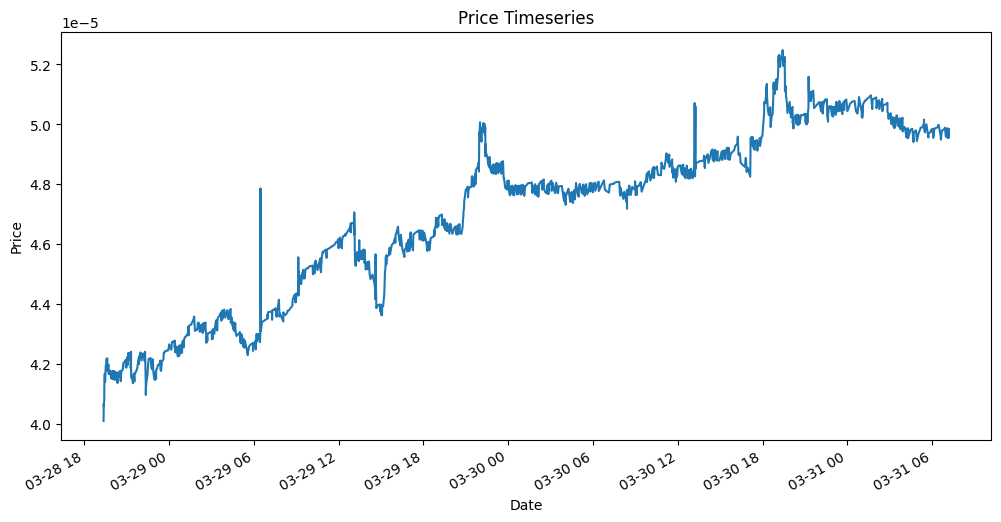

In [38]:
# Plot the price timeseries
df['price_native'].plot(figsize=(12, 6))
plt.title('Price Timeseries')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [39]:
df['returns'] = df['price_native'].pct_change()
df['log_returns'] = np.log(df['price_native']) - np.log(df['price_native'].shift(1))

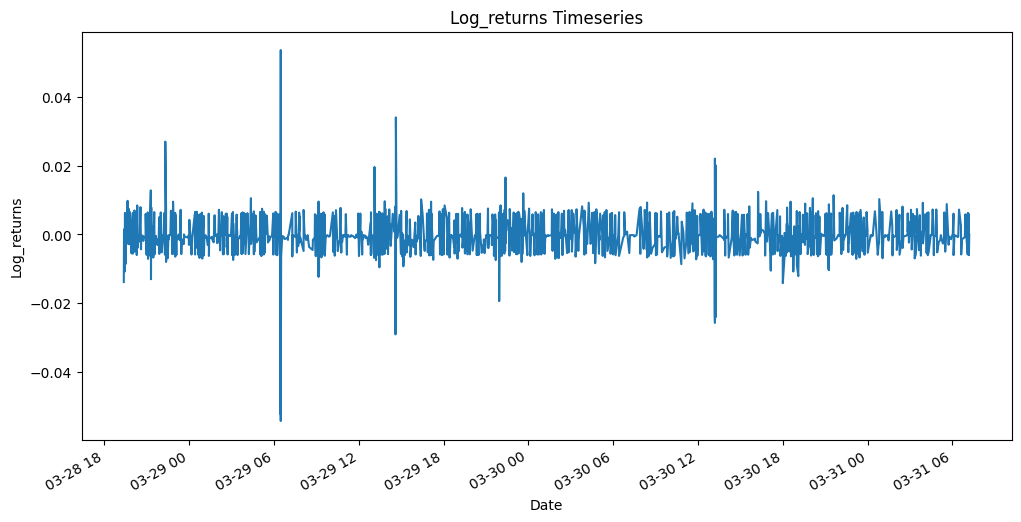

In [43]:
# Plot the price timeseries
df['log_returns'].plot(figsize=(12, 6))
plt.title('Log_returns Timeseries')
plt.xlabel('Date')
plt.ylabel('Log_returns')
plt.show()

In [32]:
df.log_returns.describe()

count    1499.000000
mean       -0.000173
std         0.005677
min        -0.054470
25%        -0.002579
50%        -0.000549
75%         0.001746
max         0.053729
Name: log_returns, dtype: float64

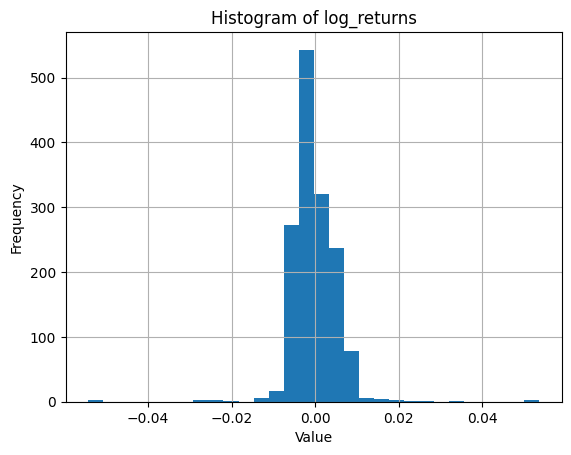

In [42]:
df['log_returns'].hist(bins = 30)

# add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of log_returns')

# display the plot
plt.show() #so far it seems quite ok, hopefully more data will result into something better

In [34]:
print(df['log_returns'].min())
q = df['log_returns'].quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])
print(q)
print(df['log_returns'].max())


-0.05447039726205549
0.01   -0.010750
0.05   -0.006795
0.25   -0.002579
0.50   -0.000549
0.75    0.001746
0.95    0.007378
0.99    0.012138
Name: log_returns, dtype: float64
0.05372919895758521


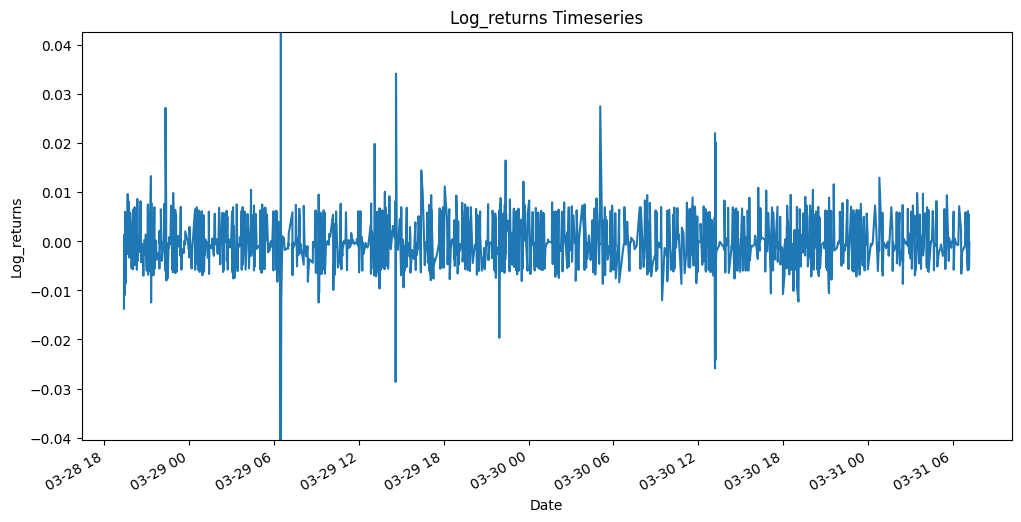

In [35]:
## Doing to plot returns with outliers cropped

# set the lower and upper percentile range for the y-axis
lower_percentile = 0.001
upper_percentile = 0.999

# calculate the lower and upper percentile values of column B
lower_value = df['log_returns'].quantile(lower_percentile)
upper_value = df['log_returns'].quantile(upper_percentile)

# Plot the price timeseries
df['log_returns'].plot(figsize=(12, 6))
plt.ylim(lower_value, upper_value)
plt.title('Log_returns Timeseries')
plt.xlabel('Date')
plt.ylabel('Log_returns')
plt.show()
